In [3]:
!pip install yfinance

  Using cached yfinance-0.2.61-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached curl_cffi-0.11.1-cp39-abi3-win_amd64.whl.metadata (15 kB)
Using cached yfinance-0.2.61-py2.py3-none-any.whl (117 kB)
Using cached curl_cffi-0.11.1-cp39-abi3-win_amd64.whl (1.4 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139097 sha256=0a0ef09d737edeb21e96bff382299c3ca7e34b418cc35addcce775d23bc23084
  Stored in directory: c:\users\del\appdata\local\pip\cache\wheels\1a\57\6a\bb7

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## Data Collection

In [8]:
now = datetime.now()

start = datetime(now.year-10, now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-28,29.514353,29.552427,29.362057,29.532271,122933200
2015-05-29,29.178400,29.440441,29.093292,29.391168,203538000
2015-06-01,29.236631,29.427005,29.126890,29.178401,128451200
2015-06-02,29.106733,29.263509,28.963395,29.084335,134670400
2015-06-03,29.142559,29.326213,29.093286,29.263503,123934000
...,...,...,...,...,...
2025-05-21,202.089996,207.039993,200.710007,205.169998,59211800
2025-05-22,201.360001,202.750000,199.699997,200.710007,46742400


In [6]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-28,29.514351,29.552425,29.362055,29.532269,122933200
2015-05-29,29.178398,29.440439,29.093290,29.391166,203538000
2015-06-01,29.236626,29.426999,29.126884,29.178396,128451200
2015-06-02,29.106728,29.263504,28.963389,29.084330,134670400
2015-06-03,29.142563,29.326217,29.093290,29.263507,123934000


In [7]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-05-21,202.089996,207.039993,200.710007,205.169998,59211800
2025-05-22,201.360001,202.750000,199.699997,200.710007,46742400
2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2025-05-27,200.210007,200.740005,197.429993,198.300003,56229000
2025-05-28,201.039993,202.729996,199.899994,200.679993,21816759


## Data Exploration & Visualization

In [9]:
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [10]:
df = df.reset_index()

In [11]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-05-28,29.514353,29.552427,29.362057,29.532271,122933200
1,2015-05-29,29.178400,29.440441,29.093292,29.391168,203538000
2,2015-06-01,29.236631,29.427005,29.126890,29.178401,128451200
3,2015-06-02,29.106733,29.263509,28.963395,29.084335,134670400
4,2015-06-03,29.142559,29.326213,29.093286,29.263503,123934000


Text(0, 0.5, 'Close price')

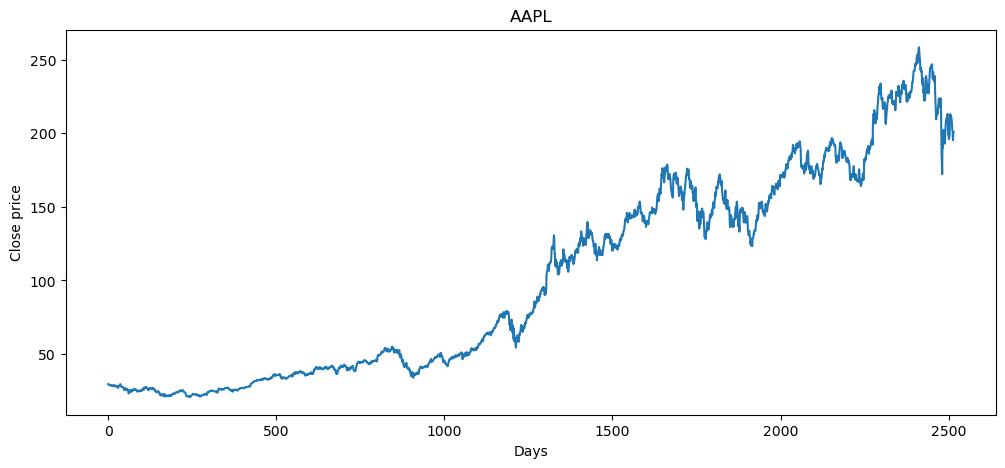

In [12]:
plt.figure(figsize = (12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

## Feature Engineering

In [13]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-05-28,29.514353,29.552427,29.362057,29.532271,122933200,NaN
1,2015-05-29,29.178400,29.440441,29.093292,29.391168,203538000,NaN
2,2015-06-01,29.236631,29.427005,29.126890,29.178401,128451200,NaN
3,2015-06-02,29.106733,29.263509,28.963395,29.084335,134670400,NaN
4,2015-06-03,29.142559,29.326213,29.093286,29.263503,123934000,NaN
...,...,...,...,...,...,...,...
98,2015-10-15,25.166330,25.220325,24.858106,24.957098,150694000,NaN
99,2015-10-16,24.981844,25.197825,24.867103,25.148329,156930400,26.737447
100,2015-10-19,25.137089,25.141588,24.772620,24.927857,119036800,26.693674


Text(0, 0.5, 'Price')

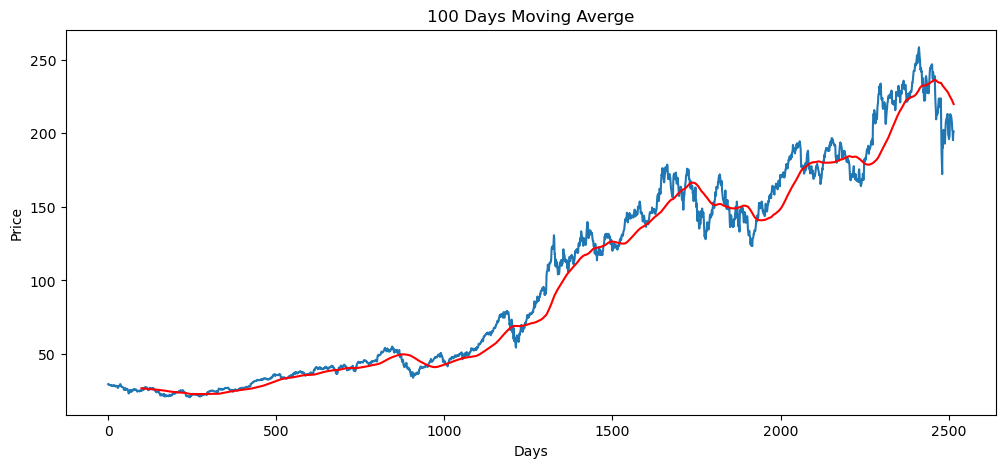

In [14]:
plt.figure(figsize = (12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Averge')
plt.xlabel('Days')
plt.ylabel('Price')

In [16]:
df['MA_200'] = df.Close.rolling(200).mean()

Text(0, 0.5, 'Price')

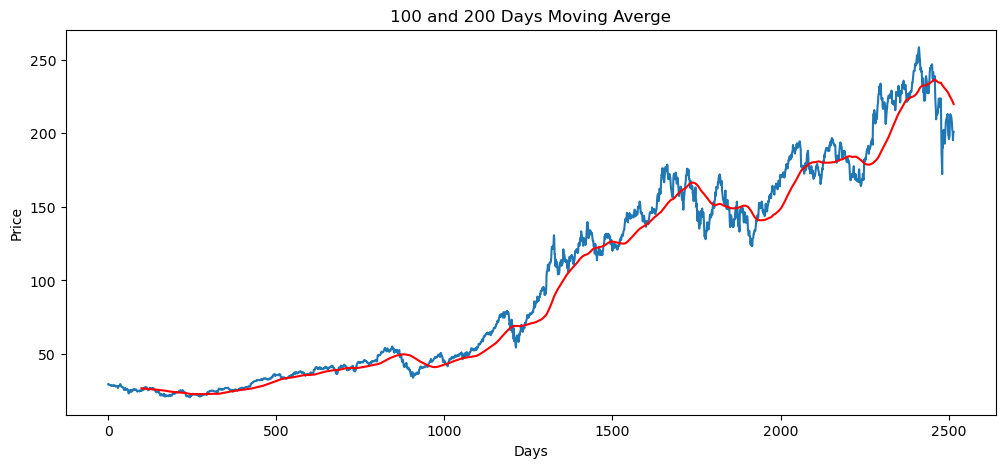

In [17]:
plt.figure(figsize = (12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('100 and 200 Days Moving Averge')
plt.xlabel('Days')
plt.ylabel('Price')

In [18]:
df['Percentage Changed'] = df.Close.pct_change()

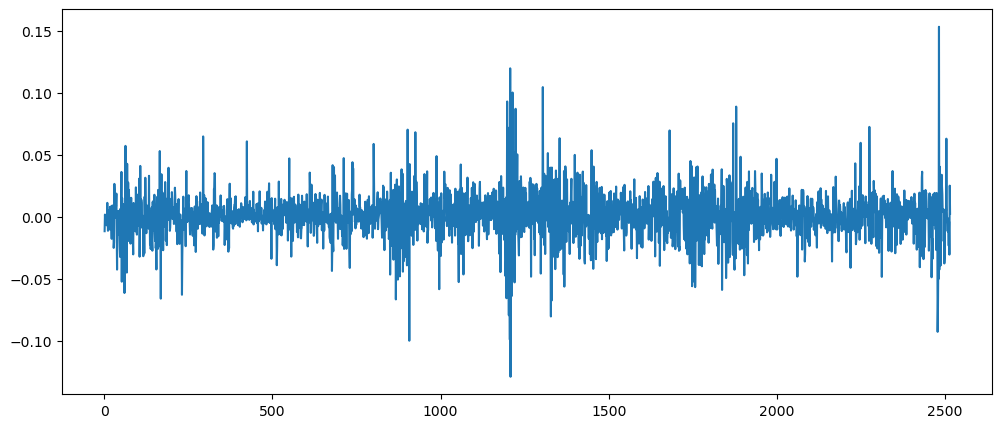

In [19]:
plt.figure(figsize = (12,5))
plt.plot(df['Percentage Changed']);

In [20]:
!pip install scikit-learn

In [21]:
!pip install keras

## Data Preprocessing

In [20]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

In [21]:
data_training

Ticker,AAPL
0,29.514353
1,29.178400
2,29.236631
3,29.106733
4,29.142559
...,...
1756,146.883514
1757,138.596466
1758,135.181274
1759,135.417480


In [22]:
data_testing

Ticker,AAPL
1761,138.143738
1762,138.301208
1763,141.509705
1764,147.277176
1765,146.489838
...,...
2511,202.089996
2512,201.360001
2513,195.270004
2514,200.210007


In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [24]:
data_training_arry = scaler.fit_transform(data_training)
data_training_arry


array([[0.05612023],
       [0.05399392],
       [0.05436248],
       ...,
       [0.72490582],
       [0.72640081],
       [0.76078592]])

## Sequence Creation

In [25]:
x_train = []
y_train = []

for i in range(100, data_training_arry.shape[0]):
    x_train.append(data_training_arry[i-100: i])
    y_train.append(data_training_arry[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)    

## Model Building

In [ ]:
!pip install tensorflow

In [ ]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [27]:
model = Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128, activation= 'tanh', return_sequences = True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

## Model Training

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 328ms/step - loss: 0.0264
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 236ms/step - loss: 5.1768e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 241ms/step - loss: 5.1167e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 240ms/step - loss: 4.8360e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - loss: 4.9303e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 238ms/step - loss: 4.2064e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 235ms/step - loss: 3.6930e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 249ms/step - loss: 3.8818e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 238ms/step - loss: 4.4022e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 257ms/step - loss: 3.4773e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 283ms/step - loss: 3.5826e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 248ms/step - loss: 3.4615e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 14s 276ms/step - loss: 3.1060e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 304ms/step - loss: 3.

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [30]:
model.save('stock_prediction_model.keras')

## Preparing Test Data

In [31]:
data_training

Ticker,AAPL
0,29.514353
1,29.178400
2,29.236631
3,29.106733
4,29.142559
...,...
1756,146.883514
1757,138.596466
1758,135.181274
1759,135.417480


In [32]:
data_testing

Ticker,AAPL
1761,138.143738
1762,138.301208
1763,141.509705
1764,147.277176
1765,146.489838
...,...
2511,202.089996
2512,201.360001
2513,195.270004
2514,200.210007


In [33]:
past_100_days = data_training.tail(100)

In [34]:
past_100_days

Ticker,AAPL
1661,174.906082
1662,174.287735
1663,178.645660
1664,176.378357
1665,171.686707
...,...
1756,146.883514
1757,138.596466
1758,135.181274
1759,135.417480


In [37]:
final_df = pd.concat([past_100_days, data_testing], ignore_index = True)

In [38]:
final_df

Ticker,AAPL
0,174.906082
1,174.287735
2,178.645660
3,176.378357
4,171.686707
...,...
850,202.089996
851,201.360001
852,195.270004
853,200.210007


In [40]:
input_data = scaler.fit_transform(final_df)
input_data

array([[3.81438657e-01],
       [3.76857474e-01],
       [4.09144278e-01],
       [3.92346381e-01],
       [3.57587090e-01],
       [3.36353503e-01],
       [3.37589577e-01],
       [3.37735184e-01],
       [3.58750586e-01],
       [3.62022892e-01],
       [3.37735184e-01],
       [3.44134302e-01],
       [3.20355538e-01],
       [2.94394935e-01],
       [2.81887686e-01],
       [2.66616737e-01],
       [2.60872170e-01],
       [2.47491959e-01],
       [2.46837521e-01],
       [2.43419721e-01],
       [3.24209479e-01],
       [3.56568974e-01],
       [3.55332787e-01],
       [3.64277195e-01],
       [3.42898002e-01],
       [3.40786705e-01],
       [3.35471385e-01],
       [3.58552525e-01],
       [3.69109912e-01],
       [3.38820564e-01],
       [3.13482520e-01],
       [3.15230026e-01],
       [3.43699065e-01],
       [3.41951559e-01],
       [3.15230026e-01],
       [3.03725857e-01],
       [2.82028319e-01],
       [2.51083741e-01],
       [2.70524376e-01],
       [2.85887347e-01],


In [41]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [43]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [44]:
x_test

array([[[0.38143866],
        [0.37685747],
        [0.40914428],
        ...,
        [0.08712726],
        [0.08887726],
        [0.12912743]],

       [[0.37685747],
        [0.40914428],
        [0.39234638],
        ...,
        [0.08887726],
        [0.12912743],
        [0.10907543]],

       [[0.40914428],
        [0.39234638],
        [0.35758709],
        ...,
        [0.12912743],
        [0.10907543],
        [0.11024209]],

       ...,

       [[0.97464918],
        [0.94959399],
        [0.93643818],
        ...,
        [0.61817743],
        [0.58283763],
        [0.57742927]],

       [[0.94959399],
        [0.93643818],
        [0.88787983],
        ...,
        [0.58283763],
        [0.57742927],
        [0.53230998]],

       [[0.93643818],
        [0.88787983],
        [0.8842582 ],
        ...,
        [0.57742927],
        [0.53230998],
        [0.56890925]]])

## Make Predictions

In [46]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step 


In [47]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [48]:
y_predicted

array([137.7155 , 137.8179 , 137.90793, 138.92944, 141.7098 , 143.94472,
       145.24208, 146.58784, 145.62782, 144.50674, 144.47783, 144.55598,
       143.00806, 139.82355, 135.6404 , 132.71028, 131.79857, 130.31236,
       129.51286, 130.37267, 131.39731, 133.00911, 135.319  , 137.1589 ,
       137.00964, 136.76526, 135.799  , 135.5315 , 136.3368 , 137.66064,
       139.79855, 141.76413, 142.39095, 142.69553, 142.67288, 143.47392,
       144.80975, 144.91777, 145.8631 , 147.4084 , 149.39328, 150.45174,
       150.5034 , 149.7879 , 150.77205, 152.11858, 154.87894, 156.79353,
       157.28586, 159.29677, 160.90353, 161.74211, 161.88036, 161.78065,
       163.19182, 164.2525 , 166.17215, 168.03355, 169.13261, 170.17119,
       170.62956, 169.76088, 167.40932, 165.44835, 164.44467, 165.01439,
       163.53526, 161.31395, 158.84546, 156.62495, 155.5186 , 154.40016,
       153.26198, 152.98824, 152.55511, 153.18973, 155.95767, 155.13803,
       154.0626 , 152.24953, 150.28136, 150.15231, 

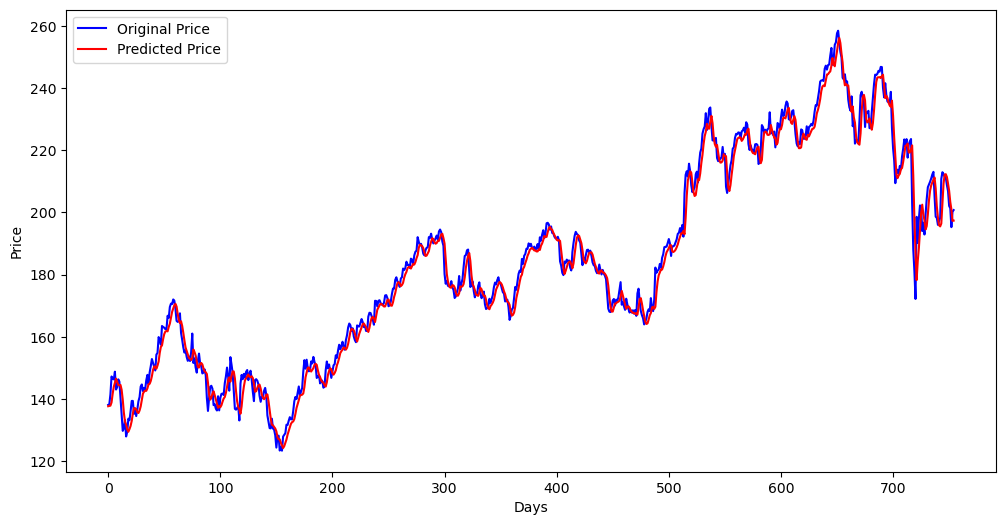

In [54]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

## Model Evaluation

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

In [56]:
mse = mean_squared_error(y_test, y_predicted)
print( f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 16.261603391653278


In [57]:
rmse = np.sqrt(mse)
print( f"Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (RMSE): 4.032567840923854


In [59]:
r2 = r2_score(y_test, y_predicted)
print(r2)

0.9846711994016557
